In [1]:
def eqPoints(POINT):
    zera = np.where(POINT == 0)[0]
    ilepow = 2**zera.size
    mylist = np.empty((ilepow-1,3))
    for n in range(1,ilepow):
        val = f"{n:b}" 
        jkl = zera.size - len(val)
        if jkl:
            val = '0'*jkl + val
        NP = POINT.copy()
        for indexV, indexP in enumerate(zera):
            if int(val[indexV]):
                NP[indexP] += 1
        mylist[n-1] = NP
    return mylist

In [2]:
def allEqPoints(CELL):
    CELLwith0s = CELL[~CELL.all(axis=1)]
    for point in CELLwith0s:
        CELL = np.append(CELL,eqPoints(point),axis =0)
    return np.unique(CELL,axis=0)
# allEqPoints(CELL2)

In [13]:
def getPositionsFromFile(lines,SUBS):
    mojekoord = []
    for SUB in SUBS:
        for line in lines:
            koord = line.split(',')
            mojalista = []
            for i in range(3):
                expr = float(sp.sympify(line)[i].evalf(2,subs=SUB))
                mojalista.append(expr)
            mojekoord.append(mojalista)
    return np.around(np.unique(mojekoord,axis = 0),6)

In [ ]:
def insideOf1Cell(cell):
    cell[cell<0] += 1
    cell[cell>1] -= 1
    return np.unique(cell,axis=0)

In [34]:
def getSliceOfEqPosition(LINES):
    for indexL, line in enumerate(LINES,1):
        if '_symmetry_equiv_pos_as_xyz' in line:
            break
#     indexL += 1
    for indexR, line in enumerate(LINES[indexL:],indexL):
        if 'loop_' in line:
            return indexL,indexR
    return None

In [ ]:
# from MMfunc import *
# Matrixes = generateSymetryBase()
# # somelist = listadous(Matrixes["4"]["001"],p)
# koordynaty = np.array([[0,0,0],[0,0,1],[0,1,0],[1,1,0],[1,0,0],[1,1,1],[1,0,1],[0,1,1],
#               [0.5,0.5,0],[0.5,0,0.5],[0,0.5,0.5],[0.5,0.5,1],[0.5,1,0.5],[1,0.5,0.5],
#              [0.75,0.25,0.25],[0.25,0.75,0.25],[0.25,0.25,0.75],[0.75,0.75,0.75]])
# komorka = supercell(koordynaty, size = 2)

In [21]:
lines

['#------------------------------------------------------------------------------',
 '#$Date: 2017-10-15 03:23:08 +0300 (Sun, 15 Oct 2017) $',
 '#$Revision: 202022 $',
 '#$URL: file:///home/coder/svn-repositories/cod/cif/1/10/00/1100043.cif $',
 '#------------------------------------------------------------------------------',
 '#',
 '# This file is available in the Crystallography Open Database (COD),',
 '# http://www.crystallography.net/',
 '#',
 '# All data on this site have been placed in the public domain by the',
 '# contributors.',
 '#',
 'data_1100043',
 'loop_',
 '_publ_author_name',
 "'Jumpertz, E. A.'",
 '_publ_section_title',
 ';',
 ' Electron-density distribution in zinc blende',
 ';',
 '_journal_name_full',
 ';',
 ' Zeitschrift f\\"ur Elektrochemie und angewandte physikalische Chemie',
 ';',
 '_journal_page_first              419',
 '_journal_page_last               425',
 '_journal_volume                  59',
 '_journal_year                    1955',
 "_chemical_formula

In [ ]:
def getTypesOfAtoms(LINES):
    for index, line in enumerate(LINES):
        if '_atom_site_fract_x' in line:
            nr = index
        
        

In [37]:
import sympy as sp
import numpy as np
import Profiling 
# lines = [line.rstrip('\n') for line in open('ZnS-Sfaleryt.cif')]
# @Profiling.profile
def sycko(file_name):
    
    #sp.init_printing(use_unicode=True)
    x,y,z = sp.symbols("x y z")

    file = [line.rstrip('\n') for line in open(file_name)]
    posL, posR = getSliceOfEqPosition(file)
    lines = file[posL:posR]
    SUBS = {x: 0,y:0,z:0}, {x: 0.25,y:0.25,z:0.25}

    cell = getPositionsFromFile(lines,SUBS)
    cell = insideOf1Cell(cell)
    cell = allEqPoints(cell)
    return cell
filename = 'ZnS-Sfaleryt.cif'
CELL = sycko(filename)
print(len(CELL))
# %timeit

18


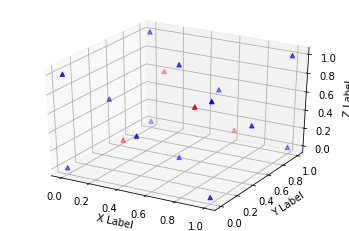

In [20]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for c, m in [('r', 'o'), ('b', '^')]:
var = np.unique(np.argwhere(CELL==0.25)[:,0])
l1 = CELL[var]
xs, ys, zs = l1.T
ax.scatter(xs, ys, zs, c="r", marker="^")

mojalista2 = CELL
mojalista2  = np.delete(mojalista2, var, 0)
xs, ys, zs = mojalista2.T
ax.scatter(xs, ys, zs, c="b", marker="^")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()